# EDA 파일의 일부 코드를 사용하기 편하게 모은 것.

- df_raw : 전체 컬럼 
- df_str : 문자타입 컬럼
- df_str_num : 각 카테고리에 숫자를 부여한 컬럼
- df_num : 숫자타입 컬럼

In [2]:
# data 가져오기
df_raw = pd.read_csv('../train.csv')

# 필요한 함수 정의

def isstr(col):
    if col.dtype == 'O':
        return True
    else:
        return False
    
# string type(정확히는 Object 타입) column만 가져오기

strcol_name=[]
i=0
col_names = df_raw.columns

for col in col_names:
    if isstr(df_raw[col]):
        strcol_name.append(i)
    i+=1
    
# SalePrice가 있는 col 포함 시켜주기 = 80번째
strcol_name.append(80)

# str 컬럼의 idx를 가져와서 str type col 만 df_str에 넣어줌.
df_str = df_raw.iloc[:, strcol_name]

# 숫자타입 column만 가져오기

numcol_name=[]
i=0
col_names = df_raw.columns

for col in col_names:
    if isstr(df_raw[col]) == False:
        numcol_name.append(i)
    i+=1

# 숫자타입 컬럼의 idx를 가져와서 숫자타입 col 만 df_num에 넣어줌.
df_num = df_raw.iloc[:, numcol_name]

# df_str 값들을 숫자로 바꿔주기
# Median을 기준으로, Median 기준으로 카테고리를 오름차순해서 숫자로 변환
# 

df_str_num = df_str.copy()

col_names = df_str_num.columns[0:-1]
for col_name in col_names:
    df1 = pd.DataFrame(df_str_num, columns=[col_name,"SalePrice"])  
    df2 = df1.groupby([col_name])["SalePrice"].median().reset_index(name='Median').sort_values('Median').reset_index(drop=True)
    def isgrade(data) :
        for idx in range(len(df2)):
            if data == df2[col_name][idx]:
                return idx+1
    df_str_num[col_name + 'Grade'] = df_str_num[col_name].apply(isgrade)
    
df_str_num = df_str_num.iloc[:,44:]

df_str_num["SalePrice"] = df_str["SalePrice"]


In [ ]:
# count NaN
def nan_check(df_raw):
    null_check = df_raw.isnull().sum()
    null_count = pd.DataFrame({'column' : null_check.index, 'NaN' : null_check.values})
    # None 값이 있는 column만 가져옴.
    null_count = null_count.query('NaN > 0')
    return(null_count)

# 상관계수 구하기 - heatmap

<숫자 데이터>


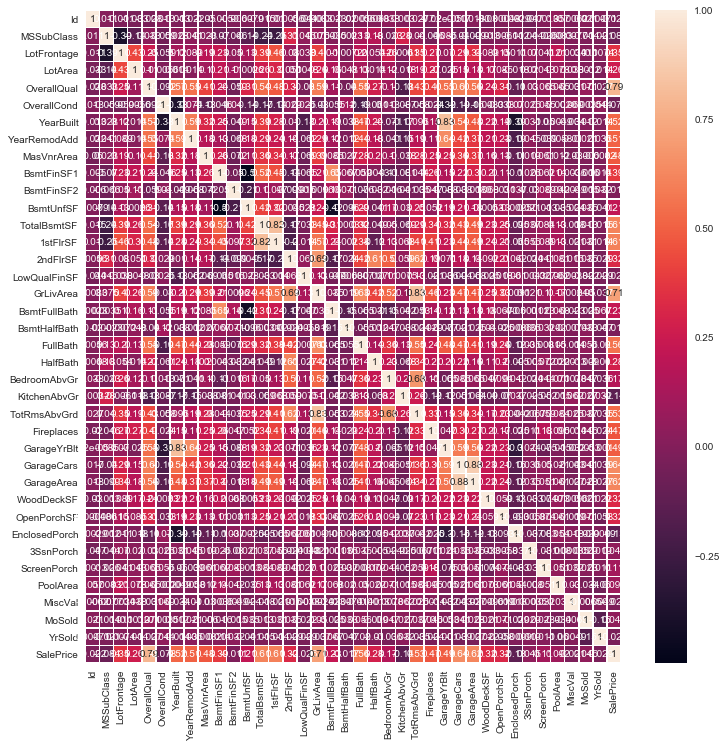

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64
<문자 데이터>


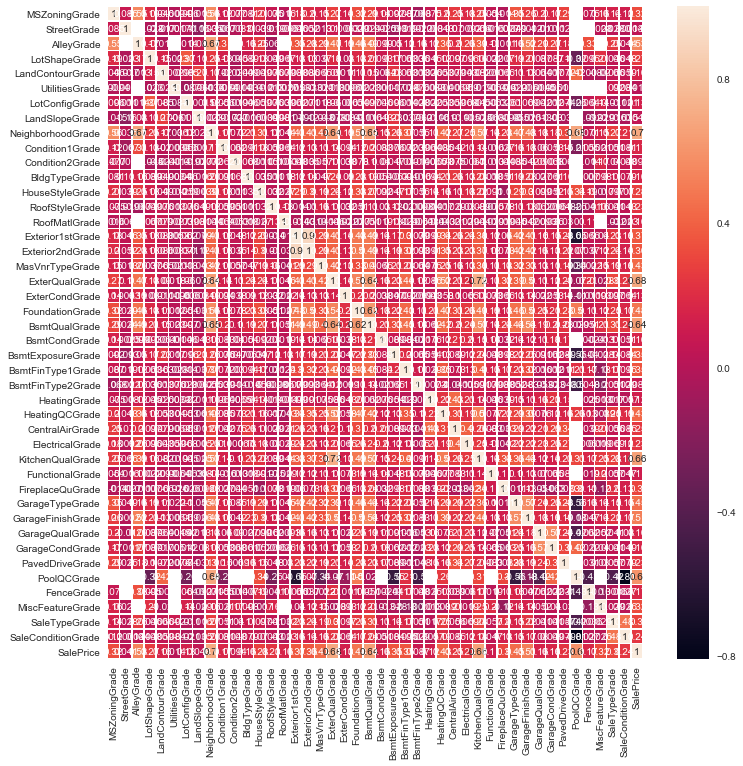

SalePrice            1.000000
NeighborhoodGrade    0.696158
ExterQualGrade       0.682639
KitchenQualGrade     0.659600
BsmtQualGrade        0.644019
PoolQCGrade          0.595229
AlleyGrade           0.534319
GarageFinishGrade    0.513105
FoundationGrade      0.478431
GarageTypeGrade      0.445945
MasVnrTypeGrade      0.429020
HeatingQCGrade       0.427649
Exterior1stGrade     0.371018
Exterior2ndGrade     0.362052
BsmtFinType1Grade    0.354137
BsmtExposureGrade    0.352958
MSZoningGrade        0.324610
MiscFeatureGrade     0.322456
SaleTypeGrade        0.297769
FireplaceQuGrade     0.295794
Name: SalePrice, dtype: float64


In [4]:
# 숫자 데이터에 대한 상관관계 확인
print("<숫자 데이터>")

heat= df_num.corr()
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(heat.iloc[:, :], annot=True, linewidths=.5, ax=ax)
plt.show()

# saleprice와의 상관관계만 보기. 내림차순으로. 상위 20개만
res = heat["SalePrice"].sort_values(ascending=False).head(20)
print(res)

# 문자 데이터에 대한 상관관계 확인 - 숫자로 치환해준 dataframe에 대해 진행
print("<문자 데이터>")

heat= df_str_num.corr()
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(heat.iloc[:, :], annot=True, linewidths=.5, ax=ax)
plt.show()

# saleprice와의 상관관계만 보기. 내림차순으로. 상위 20개만
res = heat["SalePrice"].sort_values(ascending=False).head(20)
print(res)